# Air France Case: Pivot Table and Bubble Chart

This example shows how to generate pivot table to analyze Air France Internet market case. We first read in the data.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("airfrance.csv")

In [2]:
df.columns

Index(['Publisher ID', 'Publisher Name', 'Keyword ID', 'Keyword', 'Match Type',
       'Campaign', 'Keyword Group', 'Category', 'Bid Strategy', 'Keyword Type',
       'Status', 'Search Engine Bid', 'Clicks', 'Click Charges',
       'Avg. Cost per Click', 'Impressions', 'Engine Click Thru %',
       'Avg. Pos.', 'Trans. Conv. %', 'Total Cost/ Trans.', 'Amount',
       'Total Cost', 'Total Volume of Bookings'],
      dtype='object')

## Generate Pivot Table 

We use pandas to get a pivot table. The model parameters are:

* **values** - list of fields (coulmns) we want to generate summary stats
* **index** - index for pivot table generated from categorical values of a column. if multiple columns are specified, it will generate a hierarchy of indices. For example using `['Publisher', 'Campaign']`, all campaigns under each publisher will be shown. See example below to add a filter.
* **aggfunc** - method to aggregate, for example sum, mean, ...

In [3]:
table = pd.pivot_table(df, values = ['Clicks', 'Click Charges', 'Total Volume of Bookings', 'Amount', 'Impressions'], 
                       index = ['Publisher Name'], aggfunc = np.sum, margins = True)

In [4]:
table

,Amount,Click Charges,Clicks,Impressions,Total Volume of Bookings
Publisher Name,,,,,
Google - Global,929549.80,120946.80,72895.0,1808326.0,797.0
Google - US,1745481.80,353641.35,192109.0,3855689.0,1550.0
MSN - Global,145524.25,12160.42,11217.0,139979.0,129.0
MSN - US,181549.80,16098.53,10808.0,170120.0,140.0
Overture - Global,430084.70,64296.03,60899.0,17898727.0,372.0
Overture - US,347433.25,141976.24,119323.0,17062488.0,289.0
Yahoo - US,882288.95,46198.28,45598.0,933345.0,662.0
All,4661912.55,755317.65,512849.0,41868674.0,3939.0


In [6]:
t2 = pd.pivot_table(df, values = ['Clicks', 'Click Charges', 'Total Volume of Bookings', 'Amount', 'Impressions'], 
                       index = ['Publisher Name', 'Campaign'], aggfunc = np.sum, margins = True)


In [11]:
t2.loc['Google - US'].loc[['Business Class']] # locate a specific provider and a specific campaign

,Amount,Click Charges,Clicks,Impressions,Total Volume of Bookings
Campaign,,,,,
Business Class,144.5,2288.58,443.0,13057.0,1.0


## Calcualte derived field for case analysis

`pd.concat()` function joins all dataframes (1 column each) together. axis = 1 for column join. 

In [12]:
t1 = table['Amount'] - table['Click Charges']
t2 = table['Click Charges'] / table['Clicks'] 
t3 = table['Total Volume of Bookings']
t4 = table['Amount'] / table['Total Volume of Bookings']
t5 = t1 / table['Click Charges']
t6 = table['Total Volume of Bookings'] / table['Impressions']
t7 = table['Click Charges']
t8 = table['Click Charges'] / table['Total Volume of Bookings']

t = pd.concat([t1, t2, t3, t4, t5, t6, t7, t8], axis = 1)

t.columns = ['Sume Net Revenue', 'Avg. Cost/Click', 'Total Vol. Bookings', 
             'Avg. Rev./Bookings', 'ROA', 'Prob. Booking', 'Sum Click Charges', 'Cost/Booking']

t # show the table

,Sume Net Revenue,Avg. Cost/Click,Total Vol. Bookings,Avg. Rev./Bookings,ROA,Prob. Booking,Sum Click Charges,Cost/Booking
Publisher Name,,,,,,,,
Google - Global,808603.00,1.659192,797.0,1166.310916,6.685609,0.000441,120946.80,151.752572
Google - US,1391840.45,1.840837,1550.0,1126.117290,3.935740,0.000402,353641.35,228.155710
MSN - Global,133363.83,1.084106,129.0,1128.094961,10.967041,0.000922,12160.42,94.266822
MSN - US,165451.27,1.489501,140.0,1296.784286,10.277415,0.000823,16098.53,114.989500
Overture - Global,365788.67,1.055781,372.0,1156.141667,5.689133,0.000021,64296.03,172.838790
Overture - US,205457.01,1.189848,289.0,1202.191176,1.447122,0.000017,141976.24,491.267266
Yahoo - US,836090.67,1.013165,662.0,1332.762764,18.097874,0.000709,46198.28,69.785921
All,3906594.90,1.472788,3939.0,1183.526923,5.172122,0.000094,755317.65,191.753656


In [6]:
t.to_csv("ptable.csv") # save the table to csv file

### Hierarchical index

We want to analyze at campaign level, so use `['Publisher', 'Campaign']`.

In [15]:
table_2 = pd.pivot_table(df, values = ['Clicks', 'Click Charges', 'Total Volume of Bookings', 'Amount', 'Impressions'], 
                       index = ['Publisher Name', 'Campaign'], aggfunc = np.sum)

table_2

Amount  \
Publisher Name    Campaign                                             
Google - Global   Air France Brand & French Destinations   461567.85   
                  Air France Global Campaign               467981.95   
Google - US       Air France Branded                      1517842.45   
                  Business Class                              144.50   
                  French Destinations                        5103.40   
                  Geo Targeted Boston                        2878.95   
                  Geo Targeted Chicago                       2740.40   
                  Geo Targeted DC                            3300.55   
                  Geo Targeted Detroit                        923.95   
                  Geo Targeted Houston                       7065.20   
                  Geo Targeted Los Angeles                   2183.65   
                  Geo Targeted Miami                          470.05   
                  Geo Targeted New York                     33929.45   
                  Geo Targeted Philadelphia                   434.35   
                  Geo Targeted San Francisco                 3822.45   
                  Geo Targeted Seattle                       2817.75   
                  Google_Yearlong 2006                      22373.70   
                  Outside Western Europe                        0.00   
                  Paris & France Terms                     112370.85   
                  Western Europe Destinations               27080.15   
MSN - Global      Air France Brand & French Destinations   145524.25   
MSN - US          Air France Brand & French Destinations   181549.80   
                  Business Class                                0.00   
                  Geo Targeted Seattle                          0.00   
Overture - Global Unassigned                               430084.70   
Overture - US     Unassigned                               347433.25   
Yahoo - US        Air France Branded                       832028.45   
                  Business Class                                0.00   
                  French Destinations                        1120.30   
                  General Terms                              1977.95   
                  Geo Targeted Atlanta                        170.00   
                  Geo Targeted Boston                           0.00   
                  Geo Targeted Chicago                       4403.85   
                  Geo Targeted Cincinnati                       0.00   
                  Geo Targeted DC                            1891.25   
                  Geo Targeted Detroit                          0.00   
                  Geo Targeted Houston                          0.00   
                  Geo Targeted Los Angeles                      0.00   
                  Geo Targeted Miami                            0.00   
                  Geo Targeted New York                      1650.70   
                  Geo Targeted Philadelphia                     0.00   
                  Geo Targeted San Francisco                    0.00   
                  Geo Targeted Seattle                          0.00   
                  Paris & France Terms                      24022.70   
                  Western Europe Destinations               15023.75   

                                                          Click Charges  \
Publisher Name    Campaign                                                
Google - Global   Air France Brand & French Destinations       58887.26   
                  Air France Global Campaign                   62059.54   
Google - US       Air France Branded                          114363.88   
                  Business Class                                2288.58   
                  French Destinations                           8017.65   
                  Geo Targeted Boston                           1018.62   
                  Geo Targeted Chicago                           777.30   
  

#### Add a filter

If we want to look at all campaigns under "Google - US", we can just use `table_2.loc[index]` since table_2 is basically a `DataFrame`.

In [20]:
publisher = 'Google - US'

table_2.loc[publisher]

,Amount,Click Charges,Clicks,Impressions,Total Volume of Bookings
Campaign,,,,,
Air France Branded,1517842.45,114363.88,106153.0,900619.0,1314.0
Business Class,144.50,2288.58,443.0,13057.0,1.0
French Destinations,5103.40,8017.65,3411.0,38080.0,13.0
Geo Targeted Boston,2878.95,1018.62,391.0,11617.0,4.0
Geo Targeted Chicago,2740.40,777.30,342.0,5388.0,4.0
Geo Targeted DC,3300.55,804.04,315.0,6304.0,4.0
Geo Targeted Detroit,923.95,516.79,186.0,6869.0,1.0
Geo Targeted Houston,7065.20,1673.87,568.0,20908.0,5.0
Geo Targeted Los Angeles,2183.65,967.33,371.0,8673.0,2.0


## Bubble Chart

### Get all data

* **x** - prob. of booking, rescaled by 1000
* **y** - avg. cost per click
* **bubble size** - total click cost or investment
* **color** - random
* **horizontal quadrant divider** - global avg. cost per click
* **vertical quadrant divider** - prob. of booking

In [7]:
import matplotlib.pyplot as plt

x = t['Prob. Booking'] * 1000
y = t['Avg. Cost/Click'] 
size = t['Sum Click Charges']
color = np.random.rand(7) 

glb_avg_prob_booking = np.sum(df['Total Volume of Bookings']) / np.sum(table['Impressions'])
glb_avg_cost_click = np.sum(df['Click Charges']) / np.sum(df['Clicks']) 

### Plot the chart

1. set figsize 10 x 6 (in 100 pixels)
2. use scatter to plot bubbles
3. plot two dividers
4. annotate publisher names (use t.index)
5. set axis, label, title, etc
6. show and save the plot

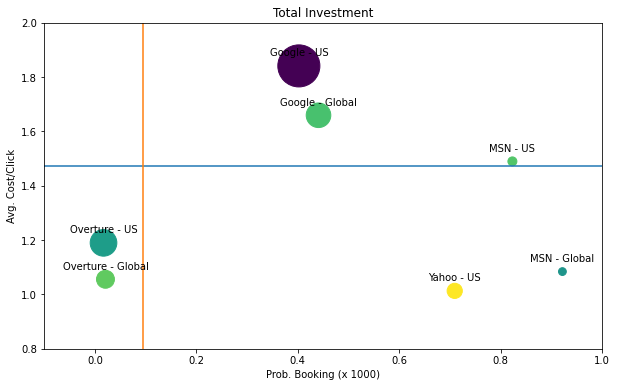

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(x, y, s = size / 200, c = color)
plt.plot([-0.1, 1], [glb_avg_cost_click, glb_avg_cost_click])
plt.plot([glb_avg_prob_booking * 1000, glb_avg_prob_booking * 1000], [0.8, 2])

for xi,yi,i in zip(x, y, t.index):
    plt.annotate(i, (xi,yi), textcoords="offset points", xytext=(0,10), ha='center')

plt.axis([-0.1, 1, 0.8, 2])
plt.xlabel("Prob. Booking (x 1000)")
plt.ylabel("Avg. Cost/Click")
plt.title("Total Investment")
plt.savefig("bubble.png")
plt.show()

# In class codes

In [15]:
t_f = pd.DataFrame()
t_f['Prob of Booking'] = table['Total Volume of Bookings'] / table['Impressions']
t_f['Avg CPC'] = table['Click Charges'] / table['Clicks'] 
t_f['Sum Click Charge'] = table['Click Charges']

In [16]:
# bubble chart
x = t_f['Prob of Booking'].drop(['All']) * 1000
y = t_f['Avg CPC'].drop(['All'])
size = t_f['Sum Click Charge'].drop(['All']) / 400
color = np.random.rand(7)

# global avg
x_g = t_f['Prob of Booking']['All'] * 1000
y_g = t_f['Avg CPC']['All']

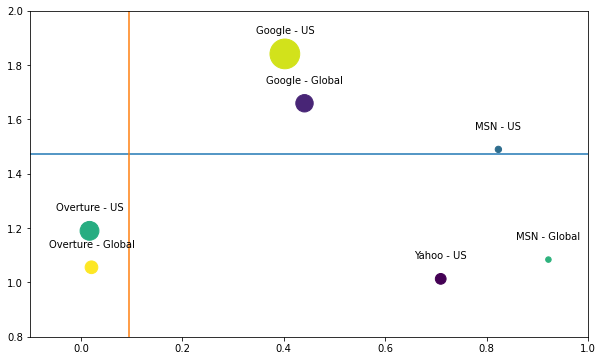

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.axis([-0.1, 1 ,0.8, 2]) # plt.axis([a, b, c, d]) 设置x轴的范围为[a, b]，y轴的范围为[c, d]
plt.scatter(x, y, s=size, c=color)

# global avg as reference line
plt.plot([-0.1, 1], [y_g, y_g]) 
plt.plot([x_g, x_g], [0.8, 2]) 

#add label to each bubble
for xi, yi, i in zip(x, y, x.index):
    plt.annotate(i, (xi, yi), textcoords = 'offset pixels', xytext=(0,20), ha = 'center')

In [27]:
for xi, yi, i in zip(x, y, x.index):
    print(xi, yi, i)

0.4407391145180681 1.659191988476576 Google - Global
0.40200337734708375 1.8408369727602558 Google - US
0.9215668064495388 1.0841062672728894 MSN - Global
0.8229485069362803 1.4895012953367877 MSN - US
0.020783600978997 1.055781375720455 Overture - Global
0.016937740849986237 1.1898480594688365 Overture - US
0.7092768483251103 1.0131646124830036 Yahoo - US
